In [2]:
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams

rcParams["figure.dpi"] = 100
rcParams["font.size"] = 12

from matplotlib import pyplot as plt
import numpy as np

from spamm.run_spamm import spamm
from astropy.modeling.powerlaws import PowerLaw1D

In [3]:
# Define the unit-less wavelength and flux
wave = np.arange(1000, 4000)

# Just generate a simple sample power law for a spectrum
pl = PowerLaw1D(amplitude=1.5e-17, x_0=2500, alpha=2.0)
flux = pl(wave)

# Make the error 5% of the flux array 
flux_err = flux * 0.05

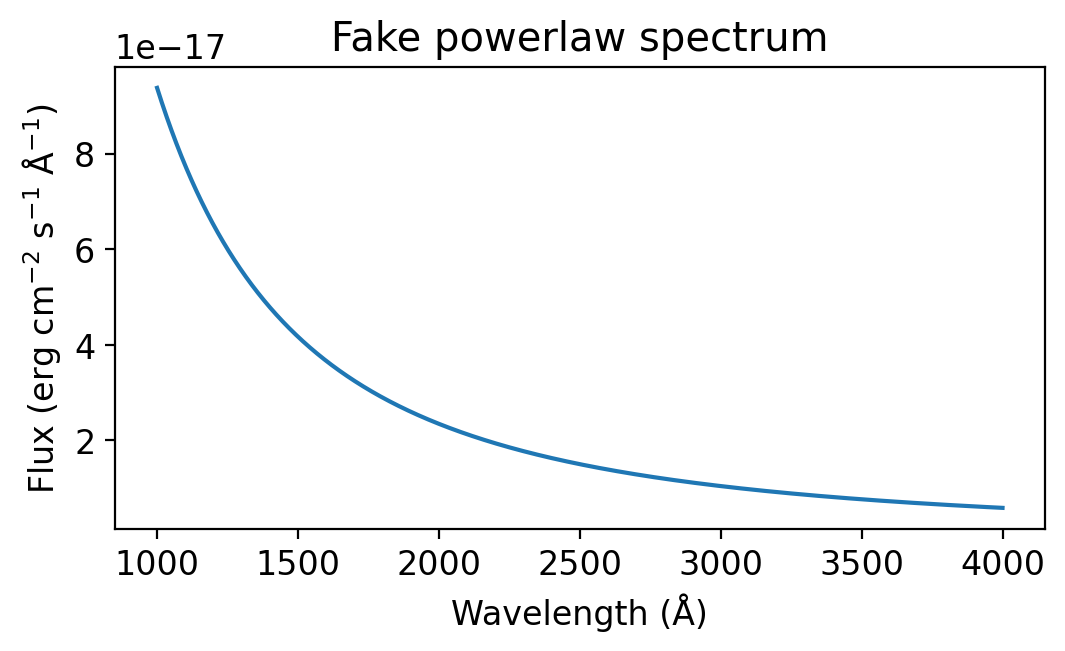

In [4]:
fig = plt.figure(figsize=(6,3))
plt.plot(wave, flux)
plt.title("Fake powerlaw spectrum")
plt.xlabel("Wavelength (Å)")
plt.ylabel(r"Flux (erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)");

In [19]:
# Run spamm
spamm_out = spamm(complist=['PL'], inspectrum=(wave, flux, flux_err),
                  n_walkers=32, n_iterations=1000, parallel=False,
                  outdir="powerlaw_example", picklefile="powerlaw")

100%|██████████████████████████████████████| 1000/1000 [00:08<00:00, 120.66it/s]


Mean acceptance fraction: 0.688
Saved pickle file powerlaw_example/powerlaw.pickle.gz
Plotting the sample projections.
	Saved powerlaw_triangle.png
Plotting the MCMC chains.
	Saved powerlaw_chain.png
Plotting the model posterior PDFs.
	Saved powerlaw_posterior.png
Saved powerlaw_example/powerlaw_posterior.pdf
executed in 0:00:08.900374


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'log(wave)')

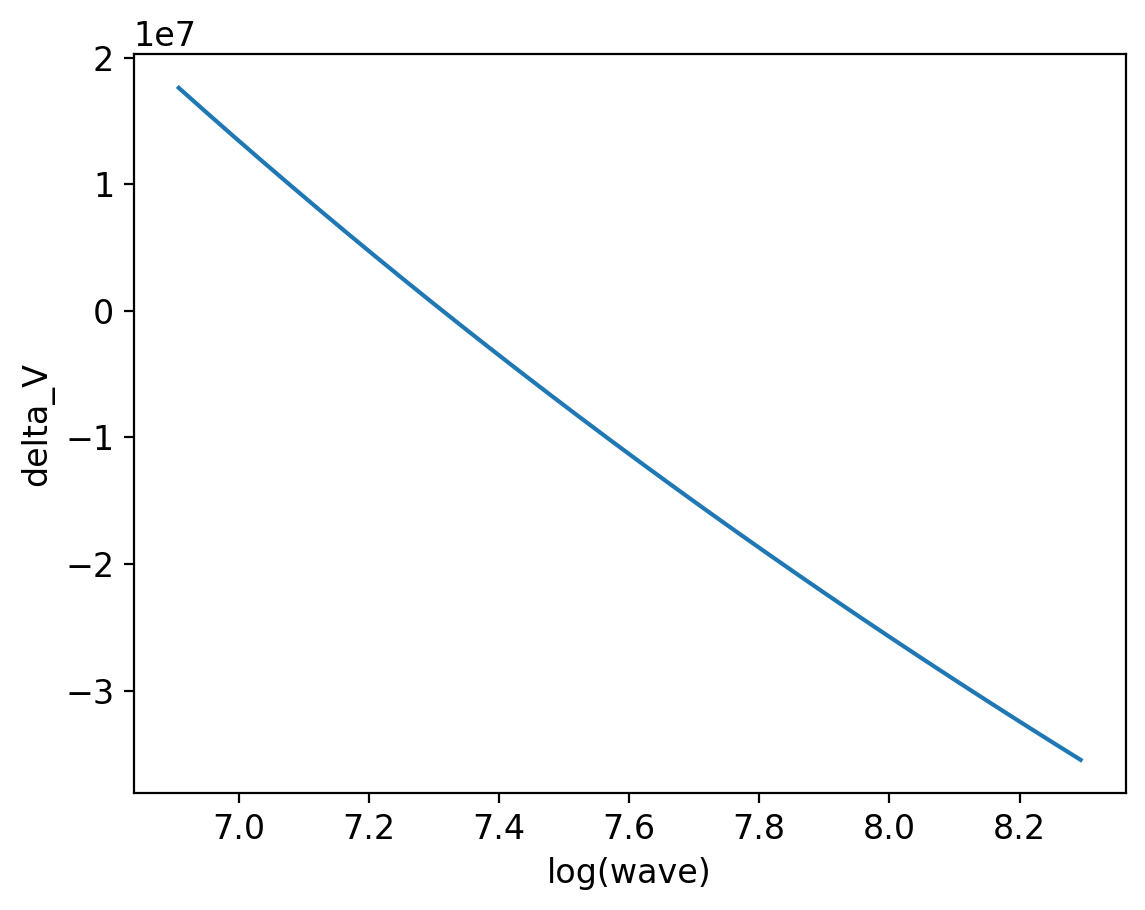

In [17]:
log_wave = np.log(wave)


def doppler(lam):
    c = 3e8
    lam0 = np.log(1500)
    dv = (lam0/lam - 1)*c
    return dv
    
dv = doppler(np.log(wave))
plt.plot(np.log(wave), dv)
plt.ylabel("delta_V")
plt.xlabel("log(wave)")

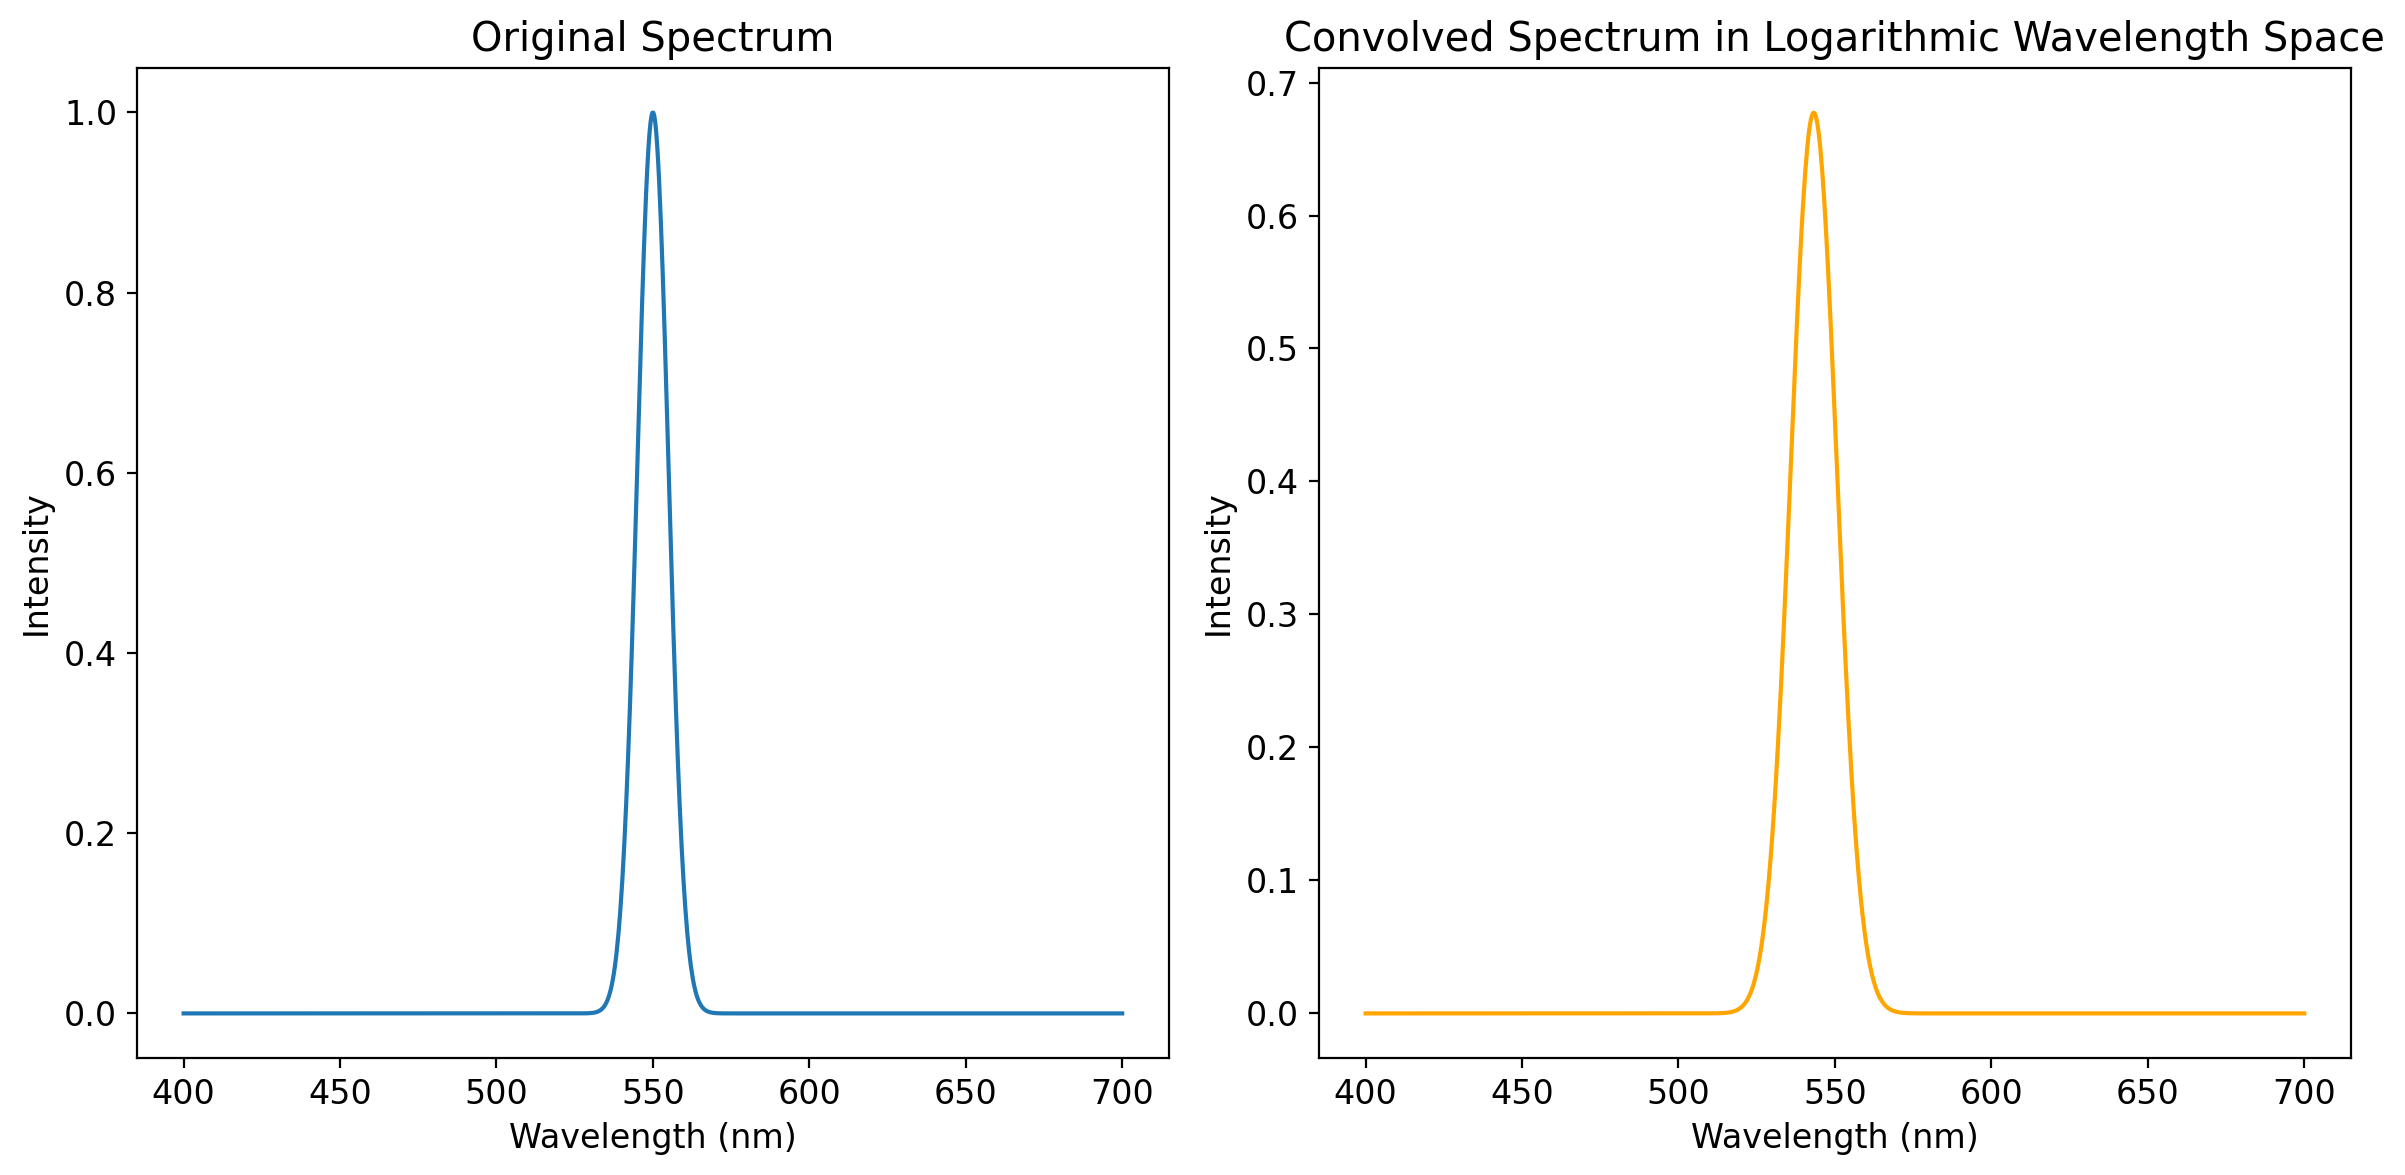

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Define a function to simulate a spectral line
def spectral_line(wavelength, center, width, amplitude=1):
    return amplitude * np.exp(-((wavelength - center) ** 2) / (2 * width ** 2))

# Generate a spectrum
wavelengths = np.linspace(400, 700, 1000)  # Wavelength range in nanometers
center = 550  # Center of the spectral line in nanometers
width = 5  # Width of the spectral line in nanometers
amplitude = 1  # Amplitude of the spectral line
spectrum = spectral_line(wavelengths, center, width, amplitude)

# Convert to logarithmic wavelength space
log_wavelengths = np.log(wavelengths)

# Generate a Gaussian kernel in logarithmic wavelength space
kernel_width = 0.01  # Width of the Gaussian kernel in log-wavelength space
kernel = np.exp(-((log_wavelengths - np.mean(log_wavelengths)) ** 2) / (2 * kernel_width ** 2))
kernel /= np.sum(kernel)  # Normalize the kernel

# Convolve the spectrum with the Gaussian kernel in logarithmic wavelength space
convolved_spectrum = convolve(spectrum, kernel, mode='same')

# Plot the original and convolved spectra
plt.figure(figsize=(12, 6))

# Plot the original spectrum
plt.subplot(1, 2, 1)
plt.plot(wavelengths, spectrum, label='Original Spectrum')
plt.title('Original Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')

# Plot the convolved spectrum
plt.subplot(1, 2, 2)
plt.plot(wavelengths, convolved_spectrum, label='Convolved Spectrum', color='orange')
plt.title('Convolved Spectrum in Logarithmic Wavelength Space')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')

plt.tight_layout()
plt.show()
